# Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [39]:
company = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Decision Tree\\Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


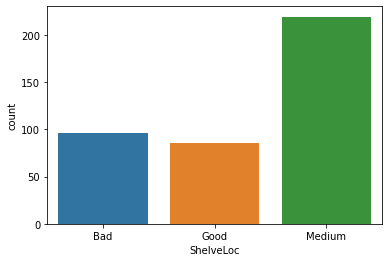

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


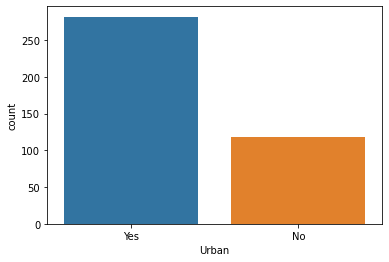

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


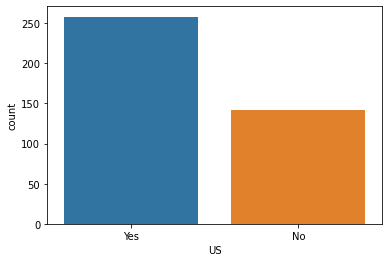

In [41]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(company['ShelveLoc'])
plt.show()

sns.countplot(company['Urban'])
plt.show()

sns.countplot(company['US'])
plt.show()


C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

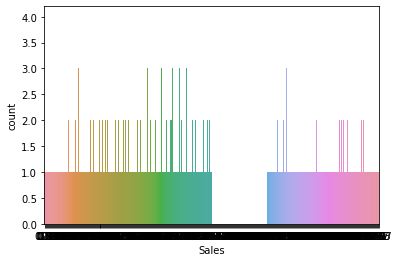

In [42]:
sns.countplot(company['Sales'])

In [43]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [44]:
# Coverting Sales column into two categories "low" and "high" at mean
sales_category = []
for value in company["Sales"]:
    if value <= 7.4963:
        sales_category.append("Low")
    else:
        sales_category.append("High")
company["SalesCategory"] = sales_category

In [45]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [46]:
company.SalesCategory.value_counts()

Low     201
High    199
Name: SalesCategory, dtype: int64

In [47]:
company['SalesCategory'] = company.Sales.map(lambda x: 1 if x > 7.4963 else 0)

In [48]:
company.SalesCategory

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: SalesCategory, Length: 400, dtype: int64

In [49]:
#Encoding the dataset
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [50]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [51]:
#Creating input and output variables
x = company.iloc[:,1:11]
y = company.iloc[:,11]

In [52]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [53]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: SalesCategory, Length: 400, dtype: int64

In [54]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Decision Tree Using Entropy Criteria C5.0

In [55]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = "balanced") 
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(141.64615384615385, 190.26, 'X[4] <= 92.5\nentropy = 1.0\nsamples = 280\nvalue = [140.0, 140.0]'),
 Text(51.50769230769231, 135.9, 'X[4] <= 81.5\nentropy = 0.465\nsamples = 39\nvalue = [3.916, 35.766]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 18\nvalue = [0.0, 18.394]'),
 Text(77.26153846153846, 81.53999999999999, 'X[6] <= 67.5\nentropy = 0.689\nsamples = 21\nvalue = [3.916, 17.372]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.491\nsamples = 18\nvalue = [1.958, 16.35]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.928\nsamples = 3\nvalue = [1.958, 1.022]'),
 Text(231.7846153846154, 135.9, 'X[2] <= 8.5\nentropy = 0.987\nsamples = 241\nvalue = [136.084, 104.234]'),
 Text(180.27692307692308, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.886\nsamples = 149\nvalue = [102.797, 44.964]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.325\nsamples = 35\nvalue = [32.308, 2.044]'),
 Text(206.03076923076924, 27.18000

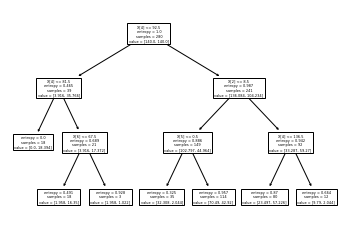

In [56]:
tree.plot_tree(model)

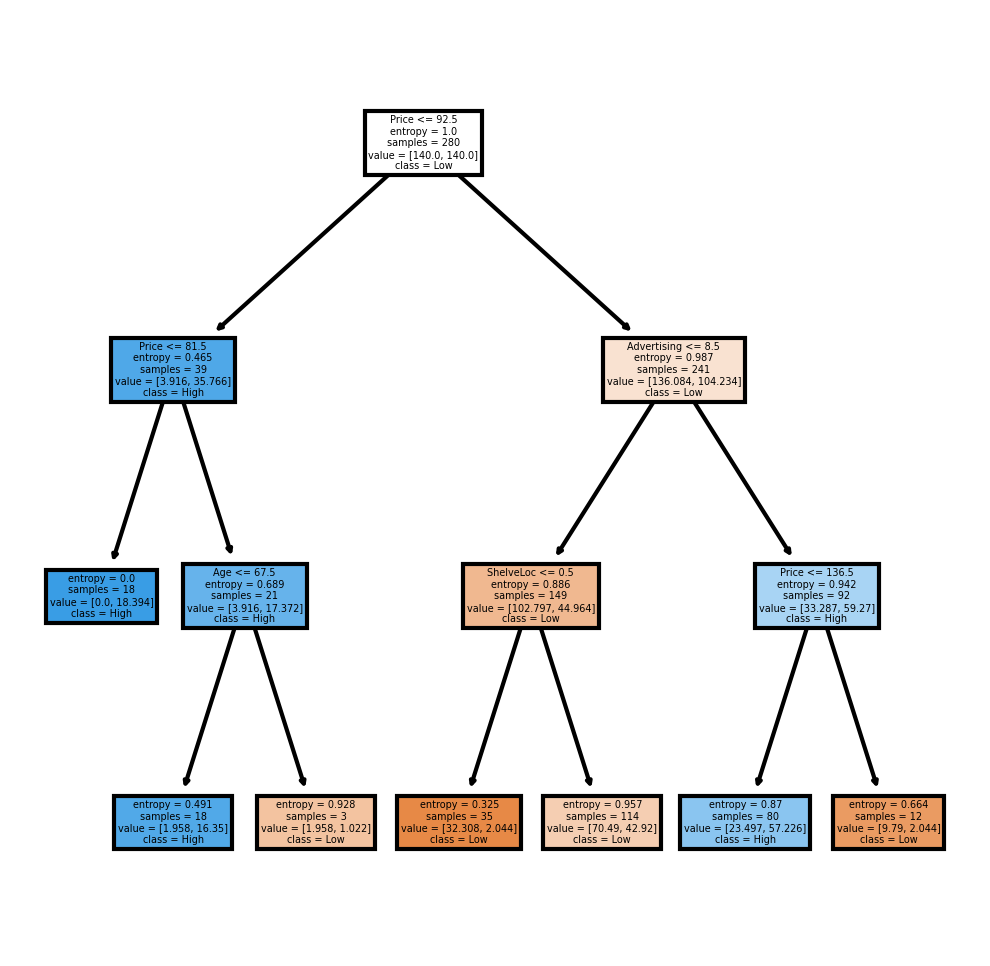

In [57]:
fn=['CommPrice','Income','Advertising','Population', 'Price', 'ShelveLoc', 'Age','Education', 'Urban', 'US'] #feature names
cn=['Low', 'High']  #category names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [58]:
#predicting on test data
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    68
1    52
dtype: int64

In [59]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [60]:
y_test

100    0
320    0
239    0
99     0
107    1
      ..
151    1
66     1
284    0
232    1
394    0
Name: SalesCategory, Length: 120, dtype: int64

In [61]:
pd.crosstab(y_test, pred)

col_0,0,1
SalesCategory,,
0,44,14
1,24,38


In [62]:
#Accuracy
np.mean(pred==y_test)

0.6833333333333333

In [63]:
model.score(x_test, y_test)

0.6833333333333333

### Decision Tree using CART

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier()

In [65]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

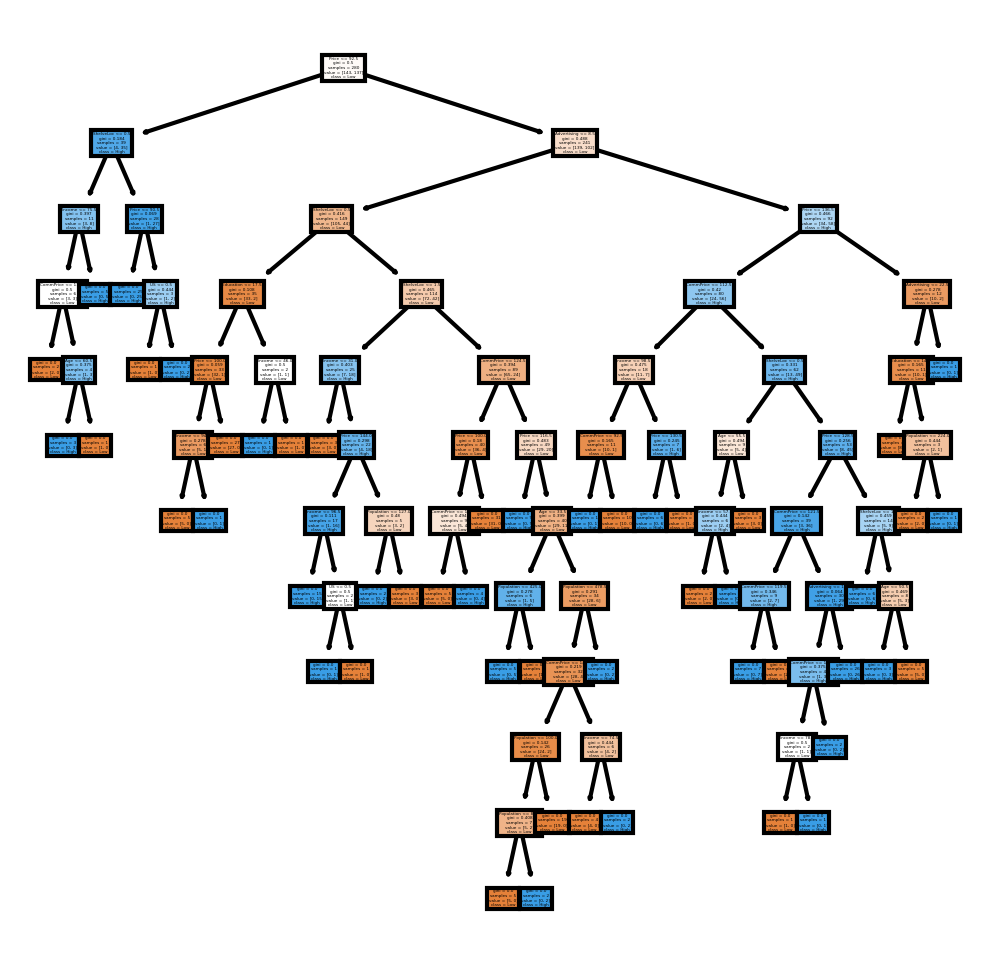

In [66]:
fn=['CommPrice','Income','Advertising','Population', 'Price', 'ShelveLoc', 'Age','Education', 'Urban', 'US'] #feature names
cn=['Low', 'High']  #category names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [67]:
#Prediction and accuracy calculation
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

1    68
0    52
dtype: int64

In [68]:
preds

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [69]:
pd.crosstab(y_test, preds)

col_0,0,1
SalesCategory,,
0,38,20
1,14,48


In [70]:
np.mean(preds==y_test)

0.7166666666666667